In [1]:
# Import the packages we will use
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math

In [2]:
import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils

In [3]:
# The following directive activates inline plotting
%matplotlib inline

In [4]:
# 1 or 6 to assign chr
chr_num = 1
chr = 'chr' + str(chr_num)

In [5]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr6.xlsx')
loops_positions = loops_info[loops_info.Chr == chr_num]

loops_x = loops_positions['Genomic bin, Left base'].values
loops_y = loops_positions['Genomic bin, Right base'].values
loops_type = loops_positions['"Extrusion track"'].values
loops_size = loops_positions['Size (Kb)'].values

## Loops reshaping into one size

### Normalized Hi-C

In [6]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'_norm.npy')

In [7]:
def plot_resized_average_with_window(arr, loop_new_size, is_window = False):
    width , height = loop_new_size, loop_new_size
    resized_image_sum = np.zeros(shape=(width,height))

    for idx, x in enumerate(loops_x): 
        window = 0
        if is_window:
            window = loops_y[idx] - loops_x[idx]
            
        if loops_x[idx]-window > 0 and loops_y[idx]+window < arr.shape[1]:
            original_image = arr[loops_x[idx]-window:loops_y[idx]+window, loops_x[idx]-window:loops_y[idx]+window]
            resized_image = loops_utils.resize_image_arr(original_image, width, height)
            resized_image_sum = resized_image_sum + resized_image

    name = 'dicty_resized_average_loop'
    if is_window:
        name += '_with_window'
    loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(resized_image_sum/loops_x.shape[0]),
                         figsize=(15, 15), name = name, is_loop_window=(window != 0))   

In [8]:
loop_new_size = 100

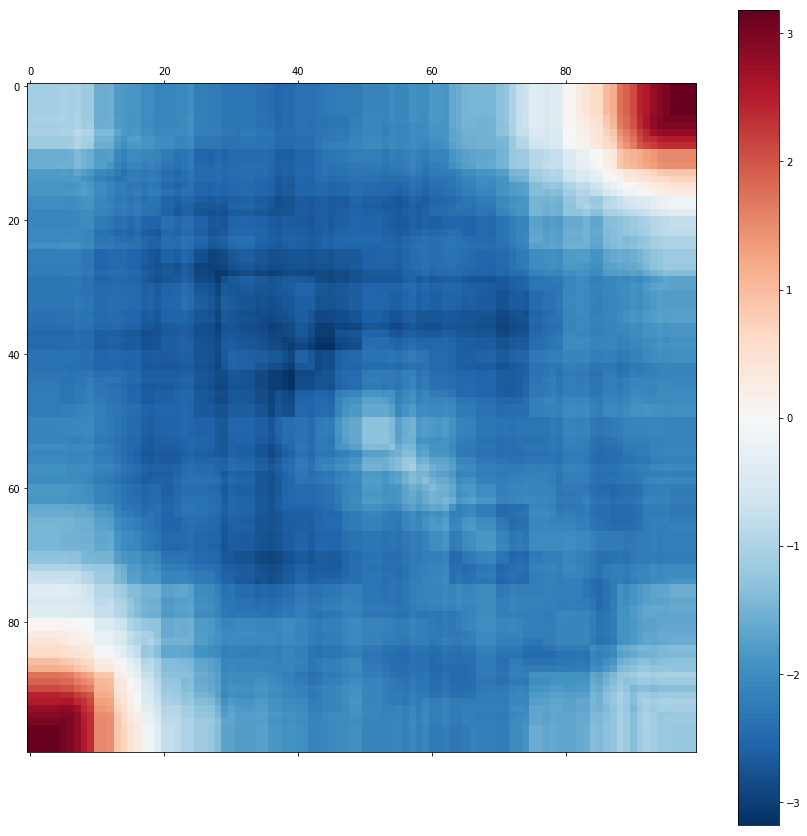

In [9]:
plot_resized_average_with_window(arr, loop_new_size)

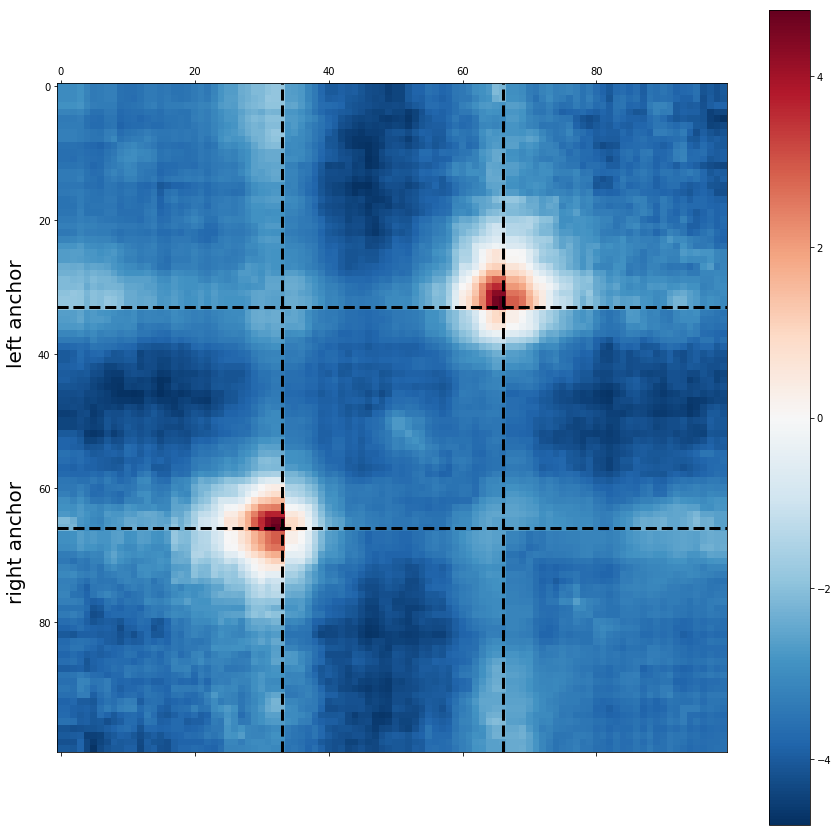

In [10]:
plot_resized_average_with_window(arr, loop_new_size, True)

### Raw Hi-C

In [11]:
#arr = np.load('arrs/2kb_chr'+str(chr_num)+'.npy')

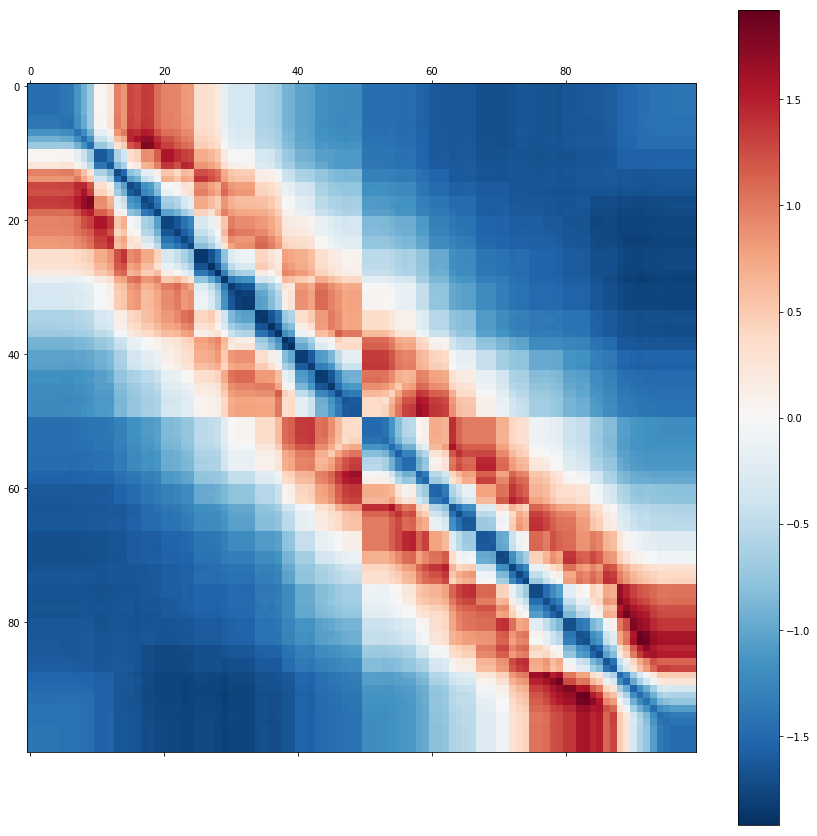

In [12]:
#plot_resized_average_with_window(arr, loop_new_size)

In [11]:
#plot_resized_average_with_window(arr, loop_new_size, True)

## Scaling
### Calculate mean contact above the distance between bins

###### raw data

In [12]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'.npy')

### loops

###### mean

/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:132: RuntimeWarning: Mean of empty slice
  scaling[i] = np.nanmean(np.diagonal(arr, i))
/Users/alex/Desktop/ws/hse/diploma/loops/loops_utils.py:155: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(range(scaling.shape[0])), np.log(scaling), 'b')


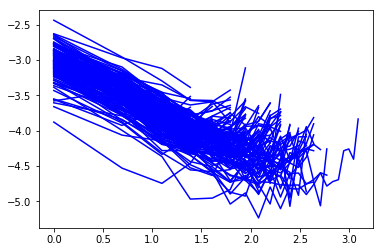

In [13]:
scaling_values = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    scaling = loops_utils.calc_scaling_mean(loop)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

###### sum

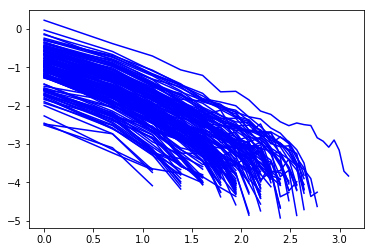

In [14]:
scaling_values = []

for idx, x in enumerate(loops_x):
    loop = arr[x:loops_y[idx], x:loops_y[idx]]
    scaling = loops_utils.calc_scaling_sum(loop)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

## Loops plus area after

In [15]:
max_loops_size = np.max(loops_y - loops_x)

In [16]:
max_loops_size

23

In [17]:
def calc_scaling_loop_plus_add_mean(x,y):
    loop = arr[x:y, x:y]
    scaling = loops_utils.calc_scaling_mean(loop)

    add = max_loops_size - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_loop = np.transpose(arr[y:y+add, x-add:x])
        after_scaling = np.flip(loops_utils.calc_scaling_mean(after_loop))

        s = np.append(scaling, after_scaling)
    
        return s
    else:
        return None

single

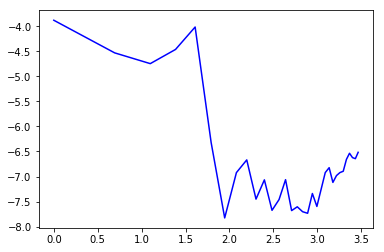

In [18]:
loops_utils.plot_scaling_values([calc_scaling_loop_plus_add_mean(loops_x[20], loops_y[20])])

all

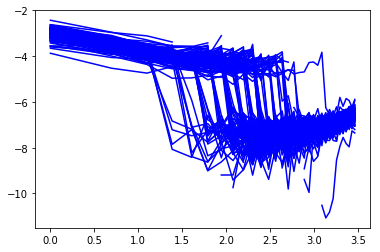

In [19]:
scaling_values = []

for idx, x in enumerate(loops_x):
    y = loops_y[idx]
    d = calc_scaling_loop_plus_add_mean(x,y)
    if d is not None: 
        scaling_values.append(calc_scaling_loop_plus_add_mean(x,y))

loops_utils.plot_scaling_values(scaling_values)

mean

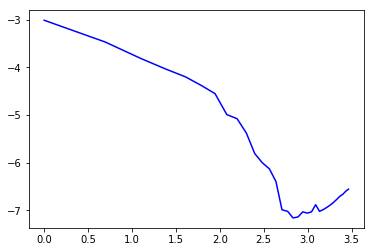

In [20]:
loop_scaling_area_mean = np.nanmean(scaling_values, axis=0)
loops_utils.plot_scaling_values([loop_scaling_area_mean])

### Interloops

###### mean

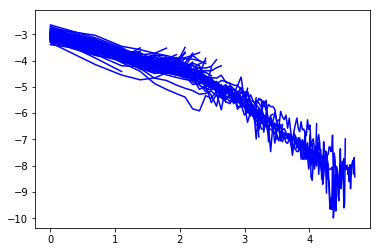

In [21]:
scaling_values = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_mean(a)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

###### sum

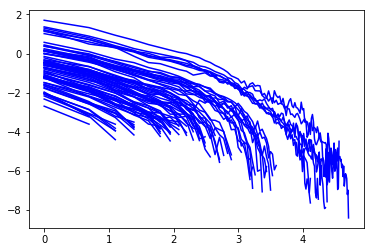

In [22]:
scaling_values = []

begin = 0

for idx, x in enumerate(loops_x):
    if begin < x:
        a = arr[begin:x, begin:x]
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_sum(a)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

## Plus area after

In [23]:
def calc_scaling_interloops_plus_add_mean(x,y):
    a = arr[x:y, x:y]
    scaling = loops_utils.calc_scaling_mean(a)

    add = max_interloops - (y - x) + 10

    if x-add > 0 and y + add < arr.shape[0]:
        after_a = np.transpose(arr[y:y+add, x-add:x])
        after_scaling = np.flip(loops_utils.calc_scaling_mean(after_a))
        s = np.append(scaling, after_scaling)    
        return s
    else:
        return None

In [24]:
begin = 0
max_interloops = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x and max_interloops < x-begin:
        max_interloops = x-begin
    begin = loops_y[idx]
    
print(max_interloops)

111


all

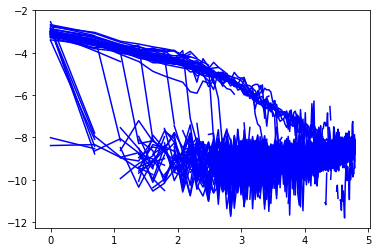

In [25]:
scaling_values = []

begin = 0

for idx in range(0, loops_x.shape[0]-1):
    x = loops_x[idx]
    if begin < x:
        scaling = calc_scaling_interloops_plus_add_mean(begin, x)
        if scaling is not None:
            scaling_values.append(scaling)  
    begin = loops_y[idx]
    
loops_utils.plot_scaling_values(scaling_values)

###### mean

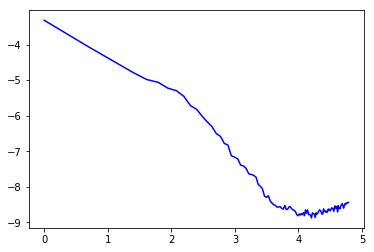

In [26]:
interloops_scaling_area_mean = np.nanmean(scaling_values, axis=0)
loops_utils.plot_scaling_values([interloops_scaling_area_mean])

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


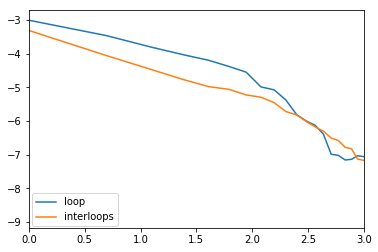

In [27]:
plt.plot(np.log(range(loop_scaling_area_mean.shape[0])), np.log(loop_scaling_area_mean), label='loop');
plt.plot(np.log(range(interloops_scaling_area_mean.shape[0])), np.log(interloops_scaling_area_mean), label='interloops');
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/dicty_avg_scaling.png')

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


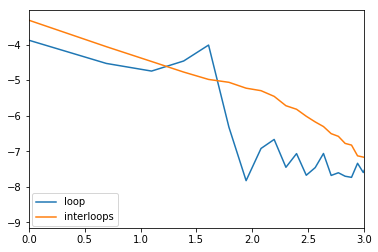

In [28]:
plt.plot(np.log(range(loop_scaling_area_mean.shape[0])), np.log(calc_scaling_loop_plus_add_mean(loops_x[20], loops_y[20])), label='loop');
plt.plot(np.log(range(interloops_scaling_area_mean.shape[0])), np.log(interloops_scaling_area_mean), label='interloops');
plt.xlim(0, 3)
plt.legend(bbox_to_anchor=(0.01, 0.16), loc=2, borderaxespad=0.)
plt.savefig('pictures/dicty_avg_vs_one_scaling.png')

### scaling in one size

###### mean

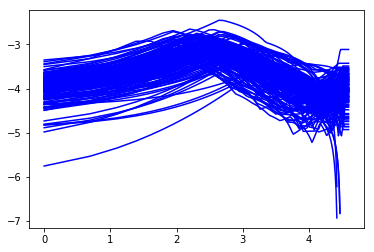

In [29]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)    
    scaling = loops_utils.calc_scaling_mean(resized_image)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


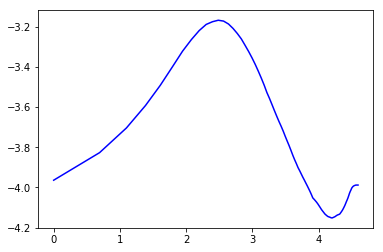

In [30]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

###### sum

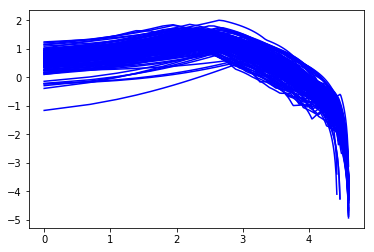

In [31]:
scaling_values = []

width , height = loop_new_size, loop_new_size
resize_image_sum = np.zeros(shape=(width,height))

for idx, x in enumerate(loops_x): 
    original_image = arr[loops_x[idx]:loops_y[idx], loops_x[idx]:loops_y[idx]]
    resized_image = loops_utils.resize_image_arr(original_image, width, height)
    scaling = loops_utils.calc_scaling_sum(resized_image)
    scaling_values.append(scaling)
    
loops_utils.plot_scaling_values(scaling_values)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


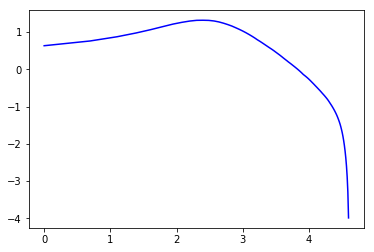

In [32]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

### Interloops

###### mean

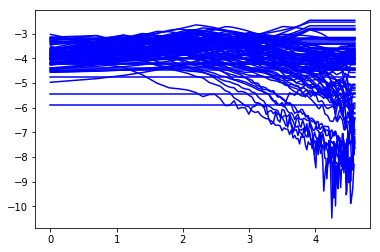

In [33]:
scaling_values = []

begin = 0

width, height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:       
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height)
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_mean(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


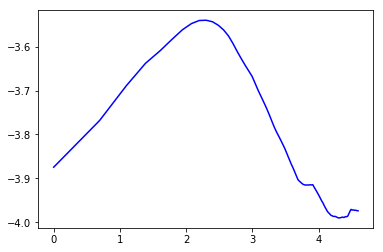

In [34]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()

###### sum

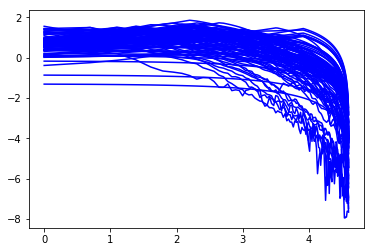

In [35]:
scaling_values = []

begin = 0

width , height = loop_new_size, loop_new_size

for idx, x in enumerate(loops_x):
    if begin < x:
        original_image = arr[begin:x, begin:x]
        resized_image = loops_utils.resize_image_arr(original_image, width, height) 
        begin = loops_y[idx]
        scaling = loops_utils.calc_scaling_sum(resized_image)
        scaling_values.append(scaling)
        
loops_utils.plot_scaling_values(scaling_values)

###### average

/anaconda3/envs/loops/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


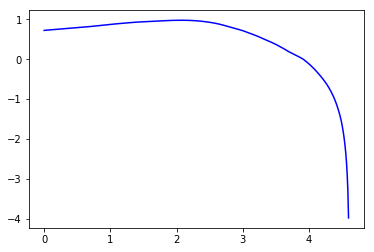

In [36]:
fig = plt.figure()
ax = plt.axes()

sum_scaling = np.zeros(scaling_values[0].shape[0])

for scaling in scaling_values:
    sum_scaling = sum_scaling + scaling
    
mean_scaling = sum_scaling/len(scaling_values)

plt.plot(np.log(range(mean_scaling.shape[0])), np.log(mean_scaling), 'b');
plt.show()